**Tugas MidTerm Big Data dan AI**  
<br>
<ul style="list-style-type:none;">
    <li>Nama: Rachmat Dwi Putra </li>
    <li>NIM : 1301180201 </li>
</ul>

# Setup Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load Dataset

In [2]:
df_titanic = pd.read_csv("Titanic-Dataset.csv") 
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Deskripsi Data

Karamnya kapal Titanic adalah salah satu insiden tenggelam kapal yang paling terkenal dalam sejarah. Pada 15 April 1912, dalam pelayaran perdananya, kapal RMS Titanic yang dianggap “tidak bisa tenggelam” tenggelam setelah bertabrakan dengan gunung es. Sayangnya, tidak tersedia cukup sekoci bagi semua orang di kapal, yang menyebabkan 1.502 orang dari 2.224 penumpang dan awak meninggal dunia.

Beberapa kelompok orang lebih cenderung selamat dibandingkan yang lain, yang menjadikan data ini menarik untuk dianalisis guna memahami faktor-faktor yang mempengaruhi tingkat keselamatan mereka.

Dataset ini digunakan untuk membangun model prediktif yang menjawab pertanyaan: “jenis orang seperti apa yang lebih mungkin selamat?” dengan menggunakan data penumpang (seperti nama, usia, jenis kelamin, kelas sosial-ekonomi, dll.).

Penjelasan Kolom:

<ul>
    <li> PassengerId: ID unik setiap penumpang </li>
    <li> Survived: Apakah penumpang selamat atau tidak (0 = Tidak, 1 = Ya) </li>
    <li> Pclass: Kelas tiket penumpang (1 = Kelas 1, 2 = Kelas 2, 3 = Kelas 3) </li>
    <li> Name: Nama penumpang </li>
    <li> Sex: Jenis kelamin </li>
    <li> Age: Usia dalam tahun </li>
    <li> SibSp: Jumlah saudara atau pasangan di kapal </li>
    <li> Parch: Jumlah orang tua atau anak di kapal </li>
    <li> Ticket: Nomor tiket </li>
    <li> Fare: Biaya tiket penumpang </li>
    <li> Cabin: Nomor kabin atau area di mana penumpang ditempatkan di dalam kapal.</li>
    <li> Embarked: Pelabuhan tempat penumpang naik ke kapal Titanic (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>

# 1. Eksplorasi Data

<ul>
    <li> Unduh dataset https://www.kaggle.com/datasets/yasserh/titanic-dataset/data </li>
    <li> Tampilkan informasi dasar tentang dataset (jumlah baris, kolom, tipe data). </li>
    <li> Lakukan eksplorasi statistik deskriptif (mean, median, distribusi, dll.). </li>
    <li> Visualisasikan beberapa fitur utama menggunakan grafik (histogram, scatterplot, dll.). </li>
</ul>

## a. Informasi dasar tentang dataset

In [3]:
df_titanic.info()

df_titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## b. Visualisasi fitur utama

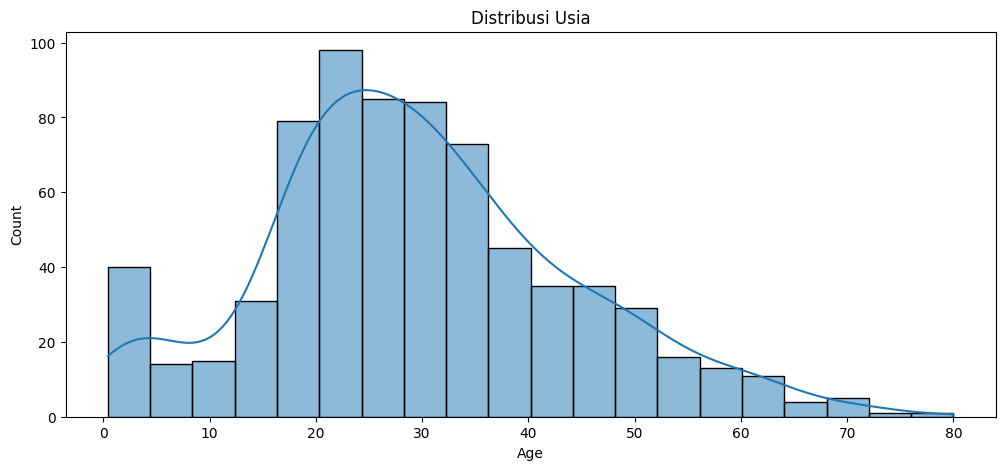

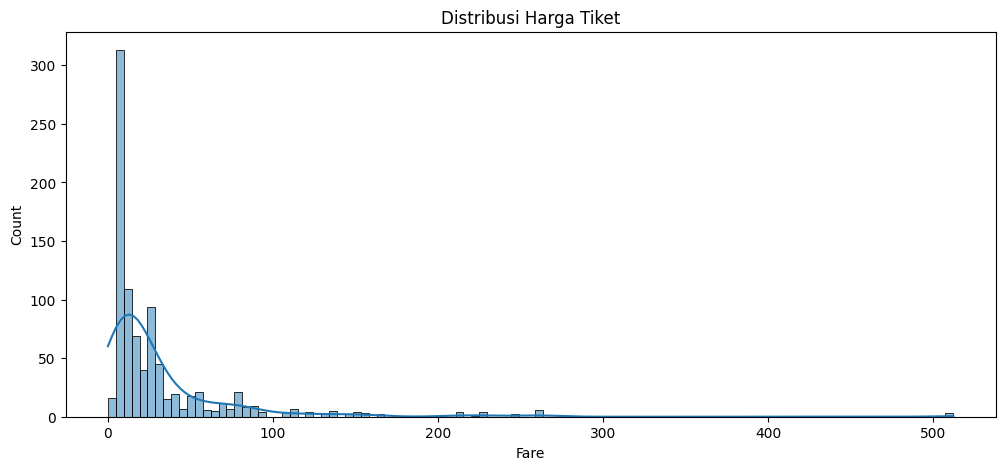

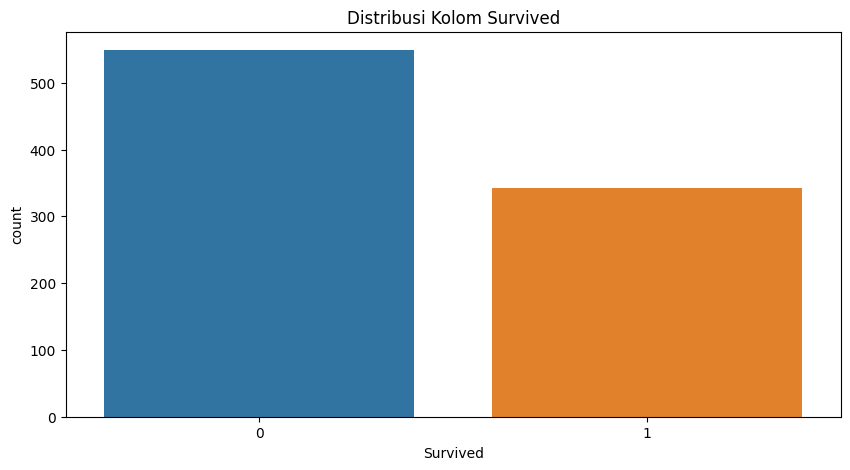

In [4]:
plt.figure(figsize=(12, 5))
sns.histplot(df_titanic['Age'], kde=True)
plt.title('Distribusi Usia')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_titanic['Fare'], kde=True)
plt.title('Distribusi Harga Tiket')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_titanic, x='Survived')
plt.title('Distribusi Kolom Survived')
plt.show()

# 2. Data Cleaning:

<ul>
    <li> Identifikasi missing values dalam dataset dan terapkan teknik imputasi atau pembersihan data yang
sesuai. </li>
    <li> Hapus atau perbaiki data duplikat dan outliers. </li>
    <li> Jika ada data kategorikal, lakukan encoding dan standardization. </li>
</ul>

## a. Menghapus data duplikat

In [5]:
df_titanic.drop_duplicates(inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## b. Menghapus kolom yang tidak diperlukan

Penjelasan:
<ul> 
    <li> kolom 'cabin' memiliki banyak nilai kosong sehingga perlu dihapus agar penggunaan dataset menjadi lebih efisien </li>
    <li> kolom 'PassengerId', 'Name', 'Ticket' merupakan informasi yang tidak berpengaruh secara langsung dalam mencari korelasi antar fitur </li>
</ul>

In [6]:
df_titanic = df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## c. Mengimputasi nilai yang hilang di kolom numerik

Penjelasan: Tujuan mengimputasi nilai yang hilang di kolom 'Age' dengan nilai rata-rata adalah untuk merepresentasikan nilai rata-rata dan memberikan gambaran umum tentang pusat dari data.

In [7]:
imputer_age = SimpleImputer(strategy='mean')
df_titanic['Age'] = imputer_age.fit_transform(df_titanic[['Age']])
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


## d. Mengimputasi nilai yang hilang di kolom kategorikal

Penjelasan: Tujuan mengimputasi nilai yang hilang di kolom 'Embarked' dengan nilai yang paling sering muncul (most frequent) adalah untuk menjaga konsistensi data dan tetap mewakili mayoritas.

In [8]:
imputer_embarked = SimpleImputer(strategy='most_frequent')
df_titanic['Embarked'] = imputer_embarked.fit_transform(df_titanic[['Embarked']])
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


## e. Mengatasi outlier

Penjelasan: Tujuan mengatasi nilai outlier pada kolom 'Fare' adalah untuk mengurangi dampak nilai ekstrem yang tidak representatif terhadap analisis data dan pemodelan sehingga diharapkan dapat memperbaiki distribusi data dan meningkatkan konvergensi serta stabilitas model.

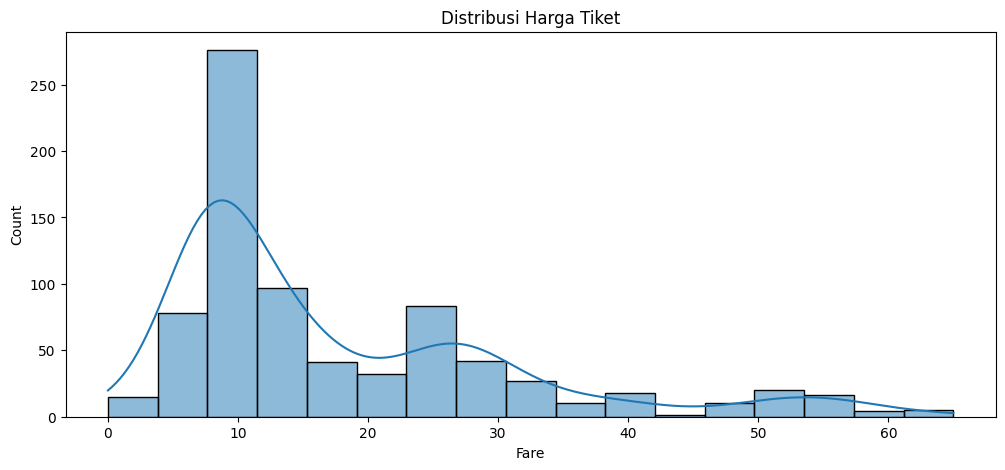

In [9]:
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
df_titanic = df_titanic[~((df_titanic['Fare'] < (Q1 - 1.5 * IQR)) | (df_titanic['Fare'] > (Q3 + 1.5 * IQR)))]

plt.figure(figsize=(12, 5))
sns.histplot(df_titanic['Fare'], kde=True)
plt.title('Distribusi Harga Tiket')
plt.show()

In [10]:
df_titanic.info()

df_titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.000000,775.00000,775,775.000000,775.000000,775.000000,775.000000,775
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,531,NaN,NaN,NaN,NaN,584
mean,0.339355,2.48000,NaN,29.103880,0.437419,0.340645,17.822091,NaN
std,0.473796,0.73439,NaN,12.779988,0.899838,0.785914,13.578085,NaN
min,0.000000,1.00000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.00000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.00000,NaN,29.699118,0.000000,0.000000,13.000000,NaN
75%,1.000000,3.00000,NaN,34.000000,1.000000,0.000000,26.000000,NaN


# 3. Transformasi Data:

<ul>
    <li> Terapkan normalisasi atau standarisasi pada kolom numerik yang relevan. </li>
    <li> Lakukan encoding untuk data kategorikal menggunakan metode seperti one-hot encoding atau label
encoding. </li>
</ul>

## a. Encoding data kategorikal

penjelasan: Sebagian besar algoritma pemodelan bekerja dengan angka, bukan teks, sehingga encoding data kategorikal ini diharapkan dapat membantu data bisa dianalisis secara efektif dalam pemodelan.

In [11]:
# Label Encoding untuk kolom yang memiliki dua kategori, seperti 'Sex'
le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

# One-Hot Encoding untuk kolom dengan banyak kategori, seperti 'Embarked'
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], drop_first=True)

df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,1
2,1,3,0,26.000000,0,0,7.9250,0,1
3,1,1,0,35.000000,1,0,53.1000,0,1
4,0,3,1,35.000000,0,0,8.0500,0,1
5,0,3,1,29.699118,0,0,8.4583,1,0


## b. Normalisasi kolom numerik yang relevan

Penjelasan: tujuan normalisasi pada kolom numerik yang relevan adalah untuk memastikan data lebih seragam dalam skala

In [12]:
scaler = StandardScaler()
df_titanic[['Fare', 'Age']] = scaler.fit_transform(df_titanic[['Fare', 'Age']])
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.556219,1,0,-0.779117,0,1
2,1,3,0,-0.243027,0,0,-0.729373,0,1
3,1,1,0,0.461654,1,0,2.599828,0,1
4,0,3,1,0.461654,0,0,-0.720161,0,1
5,0,3,1,0.046606,0,0,-0.690071,1,0


# 4. Analisis dan Visualisasi:

<ul>
    <li> Setelah membersihkan data, lakukan analisis mendalam seperti mencari korelasi antar fitur. </li>
    <li> Visualisasikan data dengan grafik yang lebih kompleks seperti box plot atau heatmap. </li>
</ul>

## a. Visualisasi

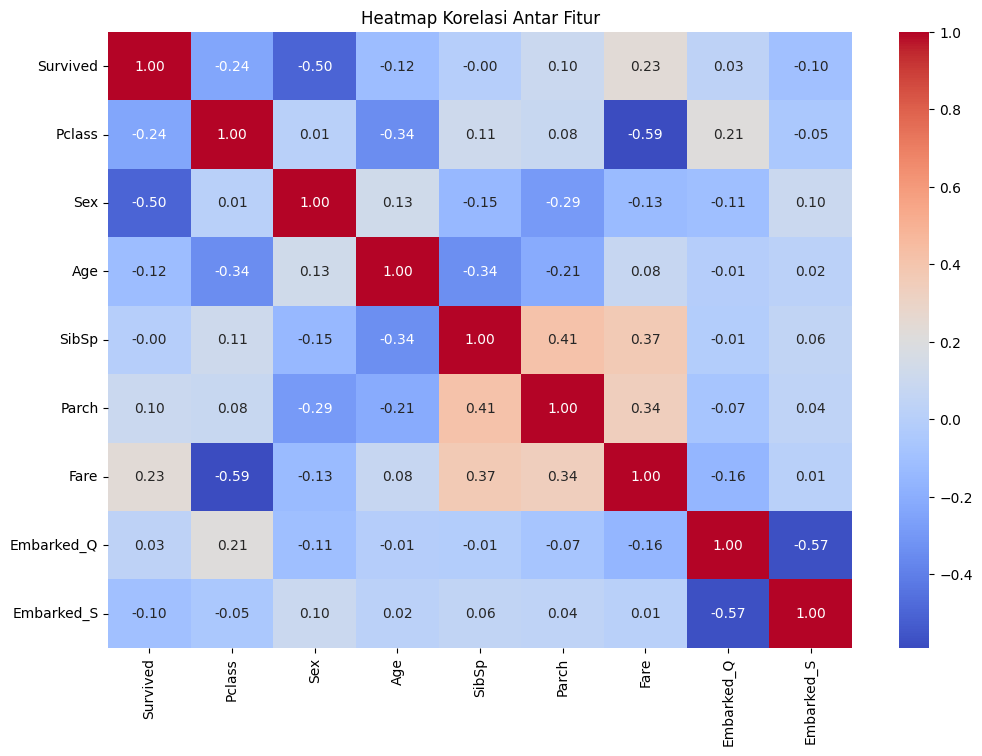

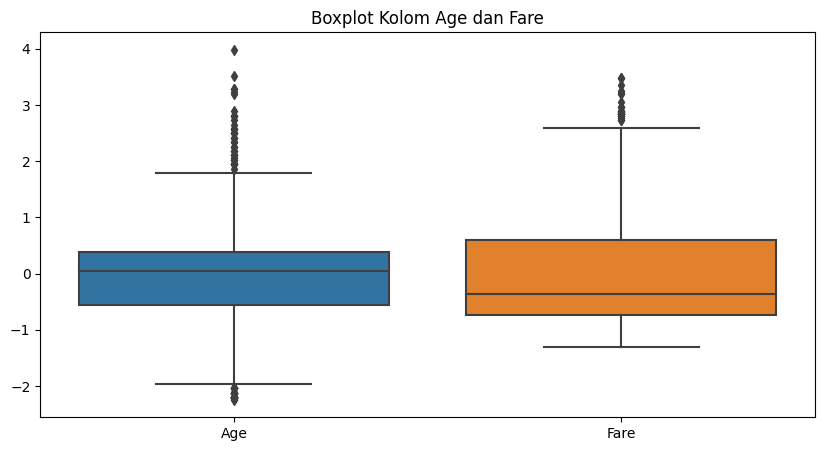

In [13]:
# Korelasi antar fitur
correlation_matrix = df_titanic.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Box plot untuk melihat distribusi kolom numerik setelah cleaning
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_titanic[['Age', 'Fare']])
plt.title('Boxplot Kolom Age dan Fare')
plt.show()

## b. Hasil Analisa

Analisa hasil visual korelasi antar fitur:
<ol>
    <li> Melihat korelasi antar fitur kolom 'SibSp', 'Parch', dan 'Fare', ternyata ketiganya memiliki korelasi paling tinggi. Sehingga disimpulkan biaya tiket penumpang yang dikeluarkan ini penting jika berkaitan dengan jumlah saudara, pasangan, orang tua, ataupun anak yang ikut serta naik di atas kapal. </li>
    <li> Sedangkan korelasi antar fitur 'Fare' dengan 'Pclass' memiliki korelasi paling rendah. Sehingga bisa disimpulkan biaya tiket penumpang di dalam data ini tidak berkaitan dengan kelas tiket penumpang. </li>
</ol>

Analisa hasil visual boxplot fitur kolom 'Age' dan 'Fare':
<ol>
    <li> Masing-masing kolom memiliki outlier </li>
    <li> Namun outlier yang masih ditemukan pada kolom 'Fare' perlu dianalisis lebih lanjut lagi, karena itu bisa berdampak signifikan pada pemodelan, mengingat beberapa penumpang membayar harga yang sangat tinggi. </li>
    <li> Data kolom 'Age' relatif lebih stabil, meskipun beberapa outlier masih perlu diperhatikan. </li>
</ol>